In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [3]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [4]:
X_train.shape, X_validation.shape, X_test.shape

((34799, 32, 32, 3), (4410, 32, 32, 3), (12630, 32, 32, 3))

In [5]:
y_train.shape, y_validation.shape, y_test.shape

((34799,), (4410,), (12630,))

## Image Exploring

Label: 41


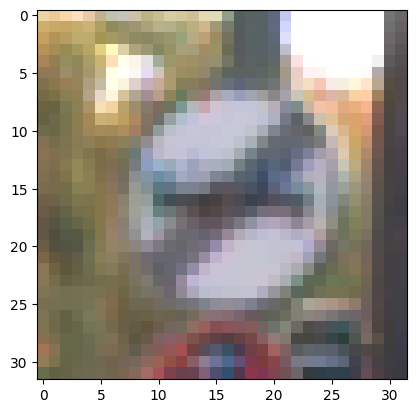

In [6]:
index = 101
plt.imshow(X_train[index].astype(np.uint8))
print("Label:", y_train[index])

Label: 41


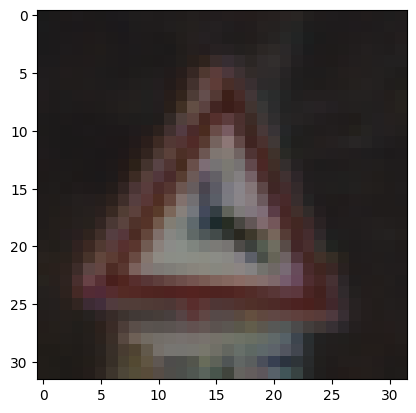

In [7]:
index = 101
plt.imshow(X_validation[index].astype(np.uint8))
print("Label:", y_train[index])

## Preparing the Data | Data Normalization  
0-255 -> 0-1

In [8]:
# shuffling
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [9]:
# averaging
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray = np.sum(X_validation/3, axis=3, keepdims=True)

In [10]:
X_train_gray.shape, X_test_gray.shape, X_validation_gray.shape

((34799, 32, 32, 1), (12630, 32, 32, 1), (4410, 32, 32, 1))

In [11]:
# normalization : pixel - 128 /128
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

Text(0.5, 1.0, 'normalized')

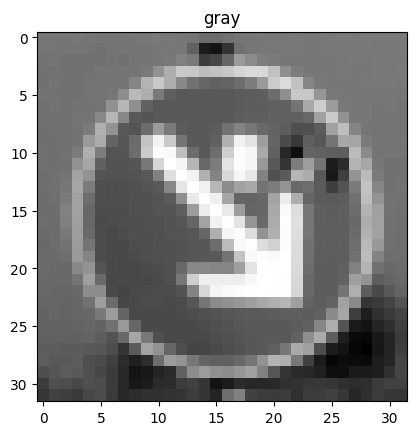

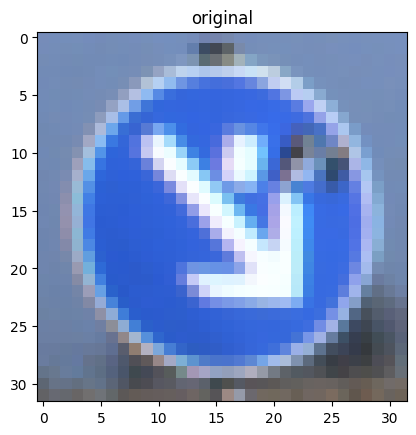

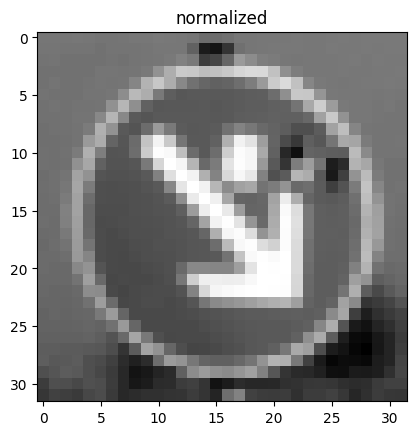

In [12]:
index = 1000
plt.imshow(X_train_gray[index].squeeze(), cmap='gray')
plt.title("gray")

plt.figure()
plt.imshow(X_train[index].astype(np.uint8))
plt.title("original")

plt.figure()
plt.imshow(X_train_gray_norm[index].squeeze(), cmap='gray')
plt.title("normalized")

## Training the Model

LeNet Architecture:

The model consists of the following layers:
### STEP 1: THE FIRST CONVOLITIONAL LAYER 
- Input = 32x32x1
- Output = 28x28x6
- Output = (Input-filter+1)/Stride* => (32-5+1)/1 =28
- Used a 5x5 Filter with input depth of 3 and output depth of 6
- Apply a RELU Activation Function to the Output
- Pooling for input, Input = 28x28x6 and Output = 14x14x6  
  
  
**A Stride is the amount by which the kernel is shifted when the kernel is passes over the image**

### STEP 2: THE SECOND CONVOLITIONAL LAYER 
- Input = 14x14x6
- Output = 10x10x16
- Layer 2: COnvolution layer with Output = 10x10x6 
- Output = (input-filter+1)/stride => 10 = 14-5+1/1
- Apply a RELU Activation Function to the Output
- Pooling for input, Input = 10x10x16 and Output = 5x5x16  

### STEP 3: FLATTENING THE NETWORK
- Flatten the network with Input = 5x5x16 and Output = 400

### STEP 4: FULLY CONNECTED LAYER
- Layer 3: Fully Connected with Input = 400 and Output = 120
- Apply RELU Activation function to the output

### STEP 5: ANOTHER FULLY CONNECTED LAYER
- Layer 4: Fully Connected Layer with input = 120 and Output = 84
- Apply a RELU Activation function to the Output

### STEP 6: FULLY CONNECTED LAYER
- Layer 5: Fully Connected layer with input = 64 and Output = 43

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

2024-08-27 15:06:12.151640: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-27 15:06:23.175884: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [14]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size=(5,5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Conv2D(filters = 16, kernel_size=(5,5), activation='relu'))
cnn_model.add(AveragePooling2D(pool_size=(2,2)))

cnn_model.add(Flatten())

cnn_model.add(Dense(units= 120, activation='relu'))

cnn_model.add(Dense(units= 84, activation='relu'))

cnn_model.add(Dense(units= 43, activation='softmax'))

/home/mavis021/Documents/fuse/env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [16]:
history = cnn_model.fit(X_train_gray_norm, 
              y_train,
              batch_size = 500,
              epochs = 8,
              verbose = 1,
              validation_data = (X_validation_gray_norm, y_validation))

Epoch 1/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 57s 577ms/step - accuracy: 0.1127 - loss: 3.4272 - val_accuracy: 0.3499 - val_loss: 2.4850
Epoch 2/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 315ms/step - accuracy: 0.5060 - loss: 1.7753 - val_accuracy: 0.6113 - val_loss: 1.2806
Epoch 3/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 314ms/step - accuracy: 0.7333 - loss: 0.9272 - val_accuracy: 0.7324 - val_loss: 0.8766
Epoch 4/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 26s 366ms/step - accuracy: 0.8119 - loss: 0.6598 - val_accuracy: 0.7807 - val_loss: 0.7304
Epoch 5/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 28s 393ms/step - accuracy: 0.8576 - loss: 0.5206 - val_accuracy: 0.8036 - val_loss: 0.6580
Epoch 6/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 331ms/step - accuracy: 0.8827 - loss: 0.4339 - val_accuracy: 0.8075 - val_loss: 0.6106
Epoch 7/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 22s 308ms/step - accuracy: 0.8954 - loss: 0.3810 - val_accuracy: 0.8206 - val_loss: 0.5833
Epoch 8/8
70/70 ━━━━━━━━━━━━━━━━━━━━ 23s 325ms/step - accuracy: 0.9158 - loss: 0.3167 - val_accuracy: 0.

# Evaluating the Model

In [17]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - accuracy: 0.8065 - loss: 0.9092
Test Accuracy: 0.8045130372047424


In [18]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [19]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

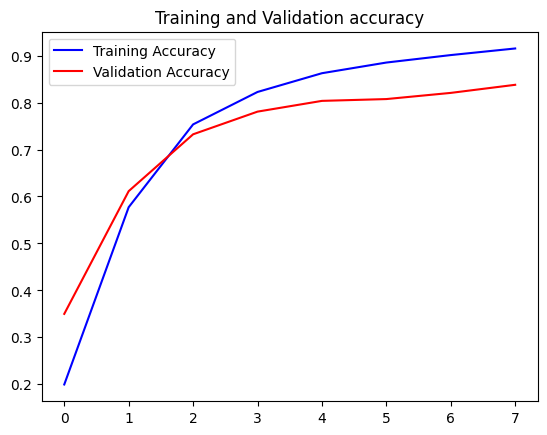

In [20]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

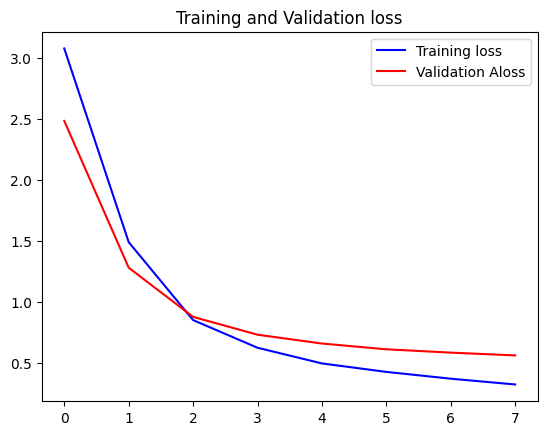

In [21]:
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation Aloss')
plt.title('Training and Validation loss')
plt.legend()

In [22]:
predicted_classes = cnn_model.predict(X_test_gray_norm)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


<Axes: >

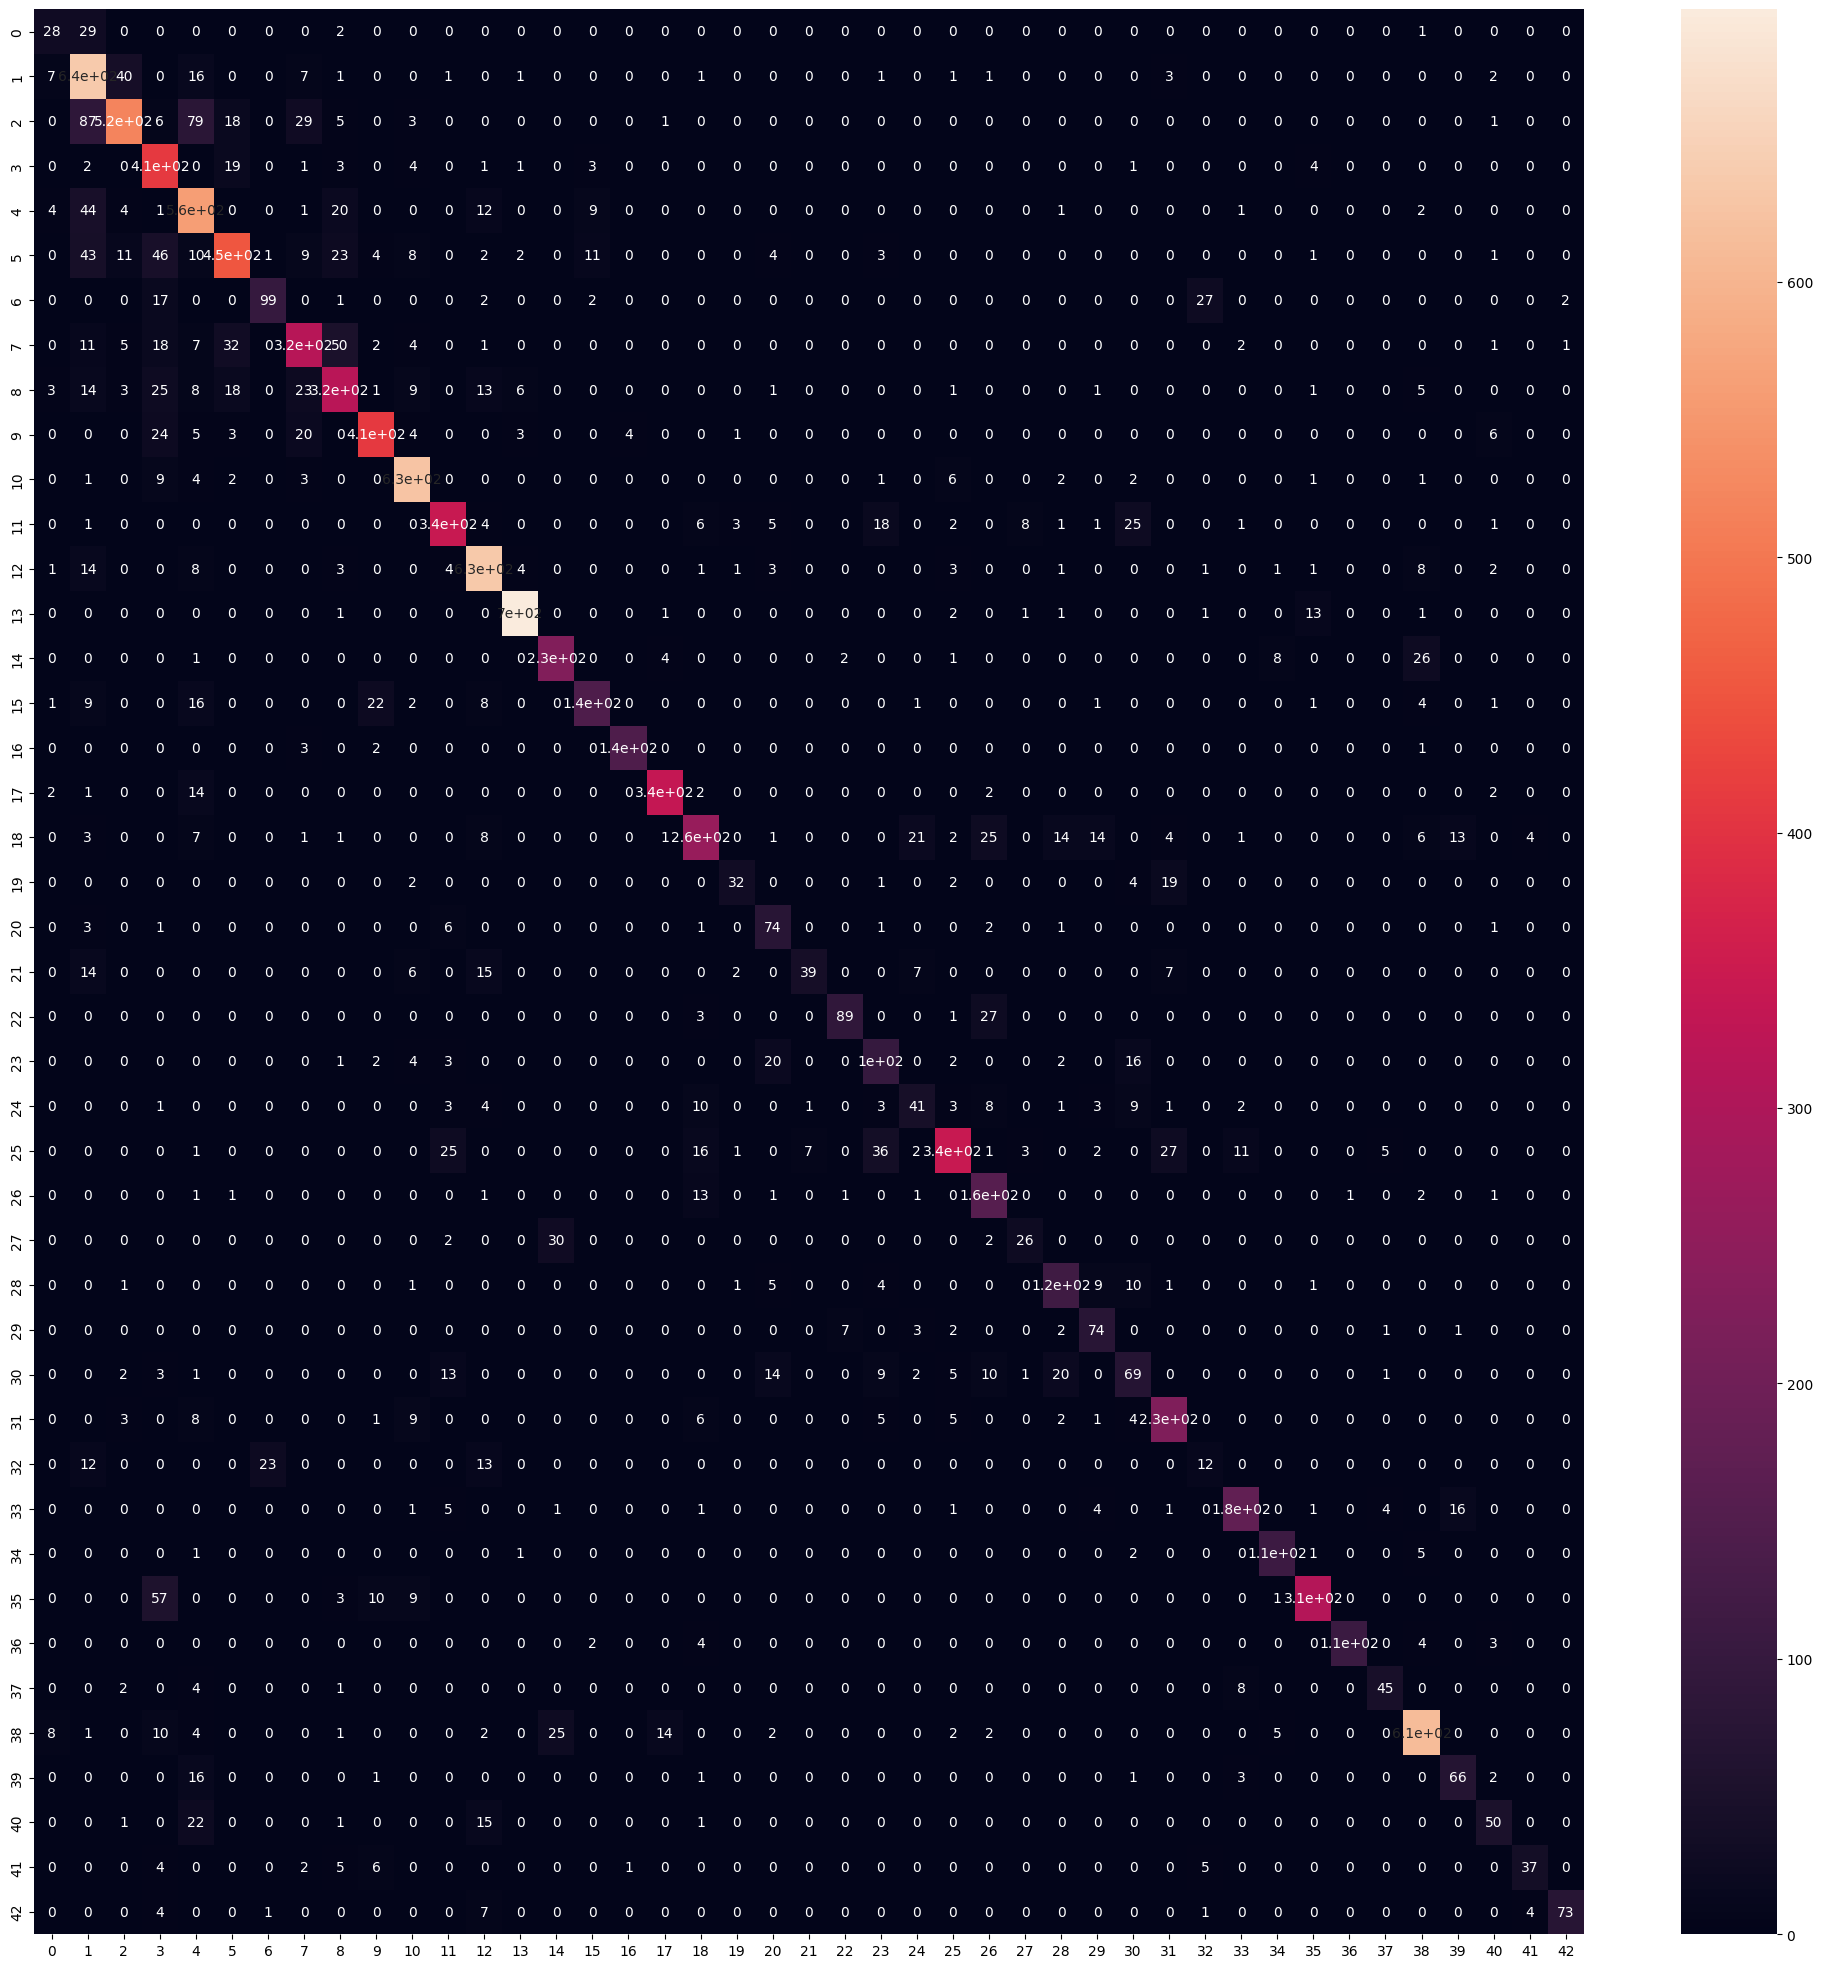

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes.argmax(axis=1))
figure = plt.figure(figsize=(25,25))
sns.heatmap(cm, annot=True)

In [24]:
predicted_classes = np.argmax(predicted_classes, axis=1)

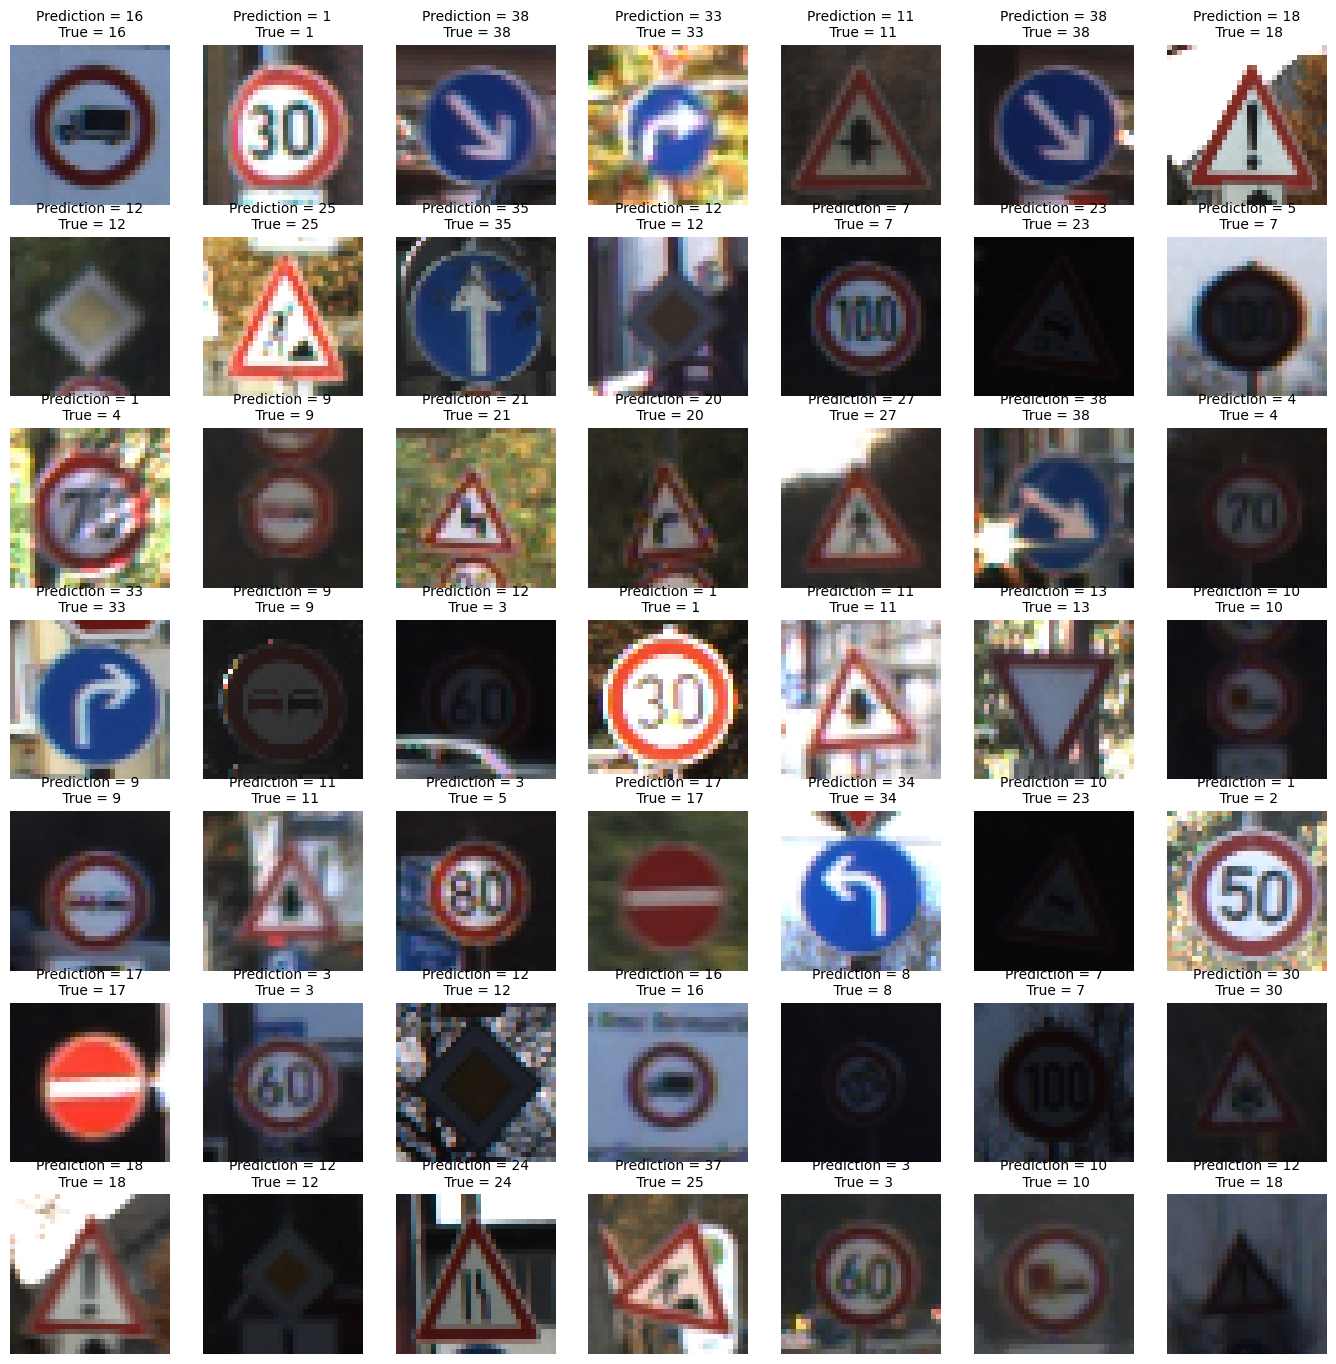

In [25]:
length = 7 
width = 7

fig, axes = plt.subplots(length, width, figsize  = (17, 17))
axes = axes.ravel()

for i in np.arange(0, length*width):
    axes[i].imshow(X_test[i].astype(np.uint8))
    axes[i].set_title("Prediction = {}\n True = {}".format(predicted_classes[i], y_true[i]),fontsize=10)
    axes[i].axis('off')